**MEMS Viewer and Diagnostics** by Andrew Jackson

This popular and flexible Engine Management system is fitted to the Rover Mini Spi and Mpi models and a large range of earlier Rover cars. It can be used in single or multi injector applications. It was superseded by the near identical MEMS 1.9. There are two versions of the ECU, one having two connectors and the other having a blanking plate in place of the second connector.

Specify the path to the MEMS readmems logfile to be read and diagnosed in the logfile variable below. The log file can be generated by running the readmems command and piping the output to a file.

**Vehicle Registration:** M117 OPP

**Vehicle Model       :** Rover Cooper SPI

**Vehicle Year        :** 1993

In [21]:
logfile = './logs/2018-11-19_faulty_thermostat.log'
logfile = './logs/2018-11-23_fixed_thermostat.log'
#logfile = './logs/readmems-2019-06-26-210700.log'

In [22]:
import mems.logreader
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
lr = mems.logreader.LogReader()
lr.read_logfile(logfile)

In [23]:
#print(lr.get_version())

lr.display_faults()

No faults


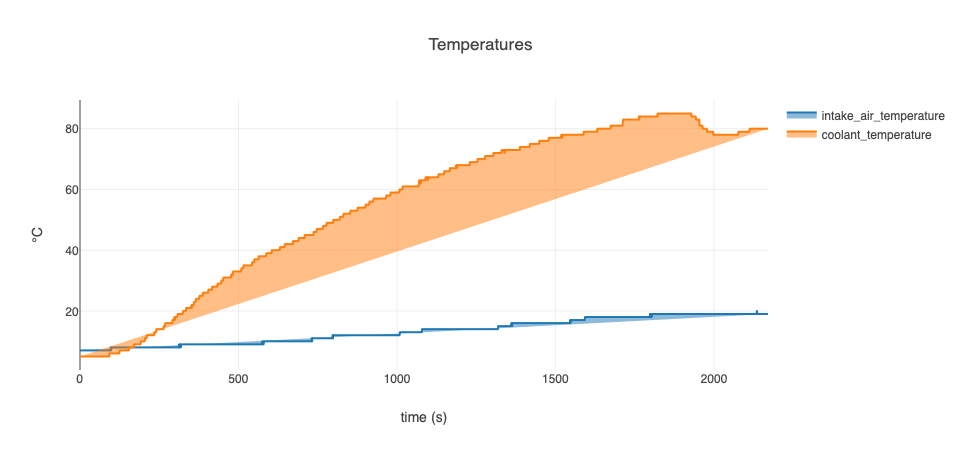

In [24]:
lr.display_graph(['intake_air_temperature','coolant_temperature'], 'Temperatures', '°C')

Coolant temperature: This shows the coolant temperature as measured by the ECU. If the sensor is open circuit, a default value of about 60°C will be displayed. During engine warm up, the value should rise smoothly from ambient to approximately 90C. Sensor faults may cause several symptoms including poor starting, fast idle speed, poor fuel consumption and cooling fans running continuously.

Inlet air temperature: This shows the temperature measured by the ECU using the inlet air temperature sensor (if fitted). If the sensor is open circuit, then a fixed default value will be displayed. The inlet air temperature is used by the ECU to retard the ignition timing to avoid knock and trim the fuelling when hot. If the sensor is not operating correctly the engine performance may be impaired slightly.

**Coolant Temperature Sensor (CTS)**

The CTS is incorporated in the cooling system, and contains a variable resistance that operates on the NTC principle. When the engine is cold, the resistance is quite high. Once the engine is started and begins to warm-up, the coolant becomes hotter, and this causes a change in the CTS resistance. As the CTS becomes hotter, the resistance of the CTS reduces (NTC principle), and this returns a variable voltage signal to the ECM based upon the coolant temperature. The open-circuit supply to the sensor is at a 5v reference level, and this voltage reduces to a value that depends upon the CTS resistance. Normal operating temperature is usually from 80°C to 100°C. The ECM uses the CTS signal as a main correction factor when calculating ignition timing and injection duration.

**Air Temperature Sensor (ATS)**

The ATS is mounted in the air inlet casing (MPi) or air filter casing (SPi), and measures the air temperature before it enters the inlet manifold. Because the density of air varies in inverse proportion to the temperature, the ATS signal allows more accurate assessment of the volume of air entering the engine. The open-circuit supply to the sensor is at a 5.0v reference level, and the earth path is through the sensor return. The ATS operates on the NTC principle. A variable voltage signal is returned to the ECM based upon the air temperature. This signal is approximately 2.0 to 3.0 volts at an ambient temperature of 20°C, and reduces to about 1.5v as the temperature rises to around 40°C. Although the air filter casing used on SPi models contains a thermal valve system, the air temperature is calculated solely by reference to the ATS.

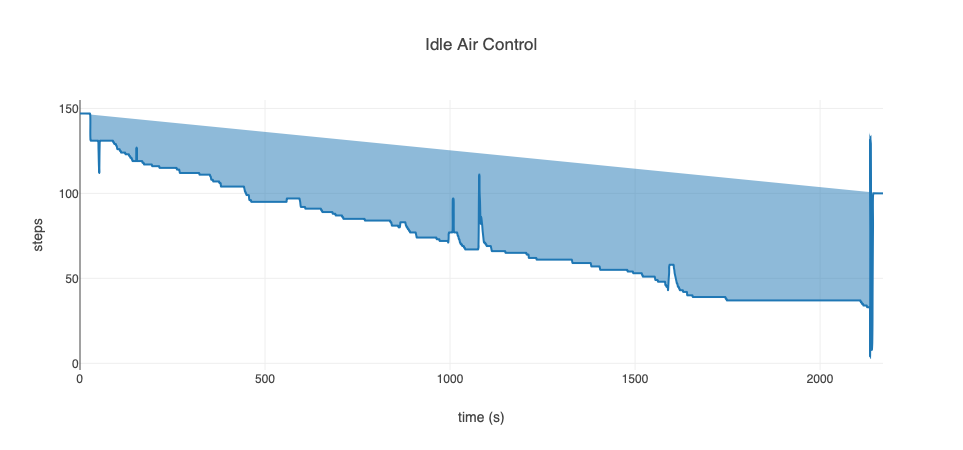

In [25]:
lr.display_graph(['idle_air_contol_position'], 'Idle Air Control', 'steps')

This is the number of steps from 0 which the ECU will use as guide for starting idle speed control during engine warm up. The value will start at quite a high value (>100 steps) on a very cold engine and fall to < 50 steps on a fully warm engine. A high value on a fully warm engine or a low value on a cold engine will cause poor idle speed control. Idle run line position is calculated by the ECU using the engine coolant temperature sensor.

**Inlet Manifold Air Valve**

The air valve stepper motor is an actuator that is used to automatically control idle speed during normal idle and during engine warm-up. When the throttle is closed, the throttle valve is locked in a position where very little air passes by. The throttle position then, will have no effect upon the idle speed.

A by-pass port to the throttle plate is located in the inlet manifold. A valve is positioned in the port. As the valve moves, the volume of air passing through the port will vary, and this directly affects the idle speed. The idle speed then, depends upon the position of the stepper air valve in the by-pass port. This method of idle control is fitted to some models (principally those with the plastic inlet manifold)from the middle of 1994

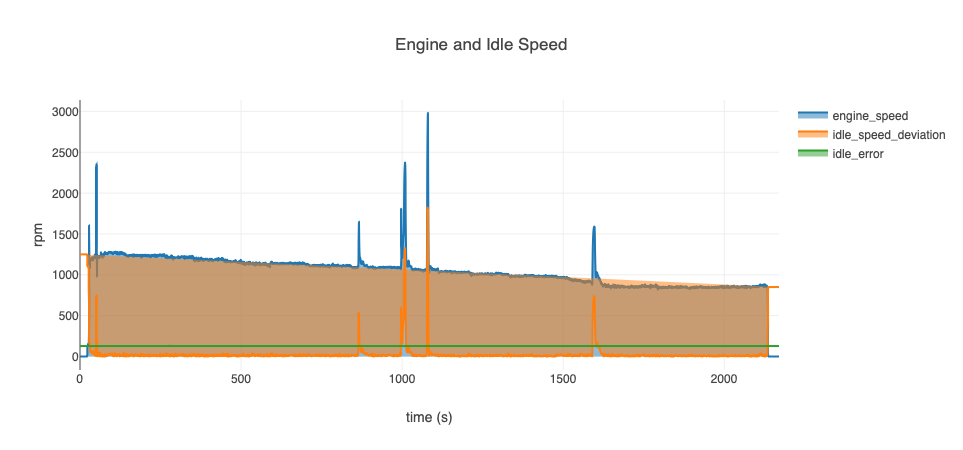

In [26]:
lr.display_graph(['engine_speed','idle_speed_deviation', 'idle_error'], 'Engine and Idle Speed', 'rpm')

Engine speed: The rotational speed of the engine calculated by the MEMS ECU using the crankshaft sensor. Faults in the crankshaft sensor or associated wiring may be indicated if this display reads 0 during engine cranking.

Idle Speed Deviation is the current difference between the target idle speed set by the MEMS ECU and the actual engine speed. A value of more than 100 RPM indicates that the ECU is not in control of the idle speed. This indicates a possible fault condition. A quick addition of this value and the current engine RPM will also tell what the value is of the ECU's target Idle Speed.

Idle Error is the number of IACV steps from fully closed (0) which the ECU has learned as the correct position to maintain the target idle speed with a fully warmed up engine. If this value is outside the range 10 - 50 steps, then this is an indication of a possible fault condition or poor adjustment.

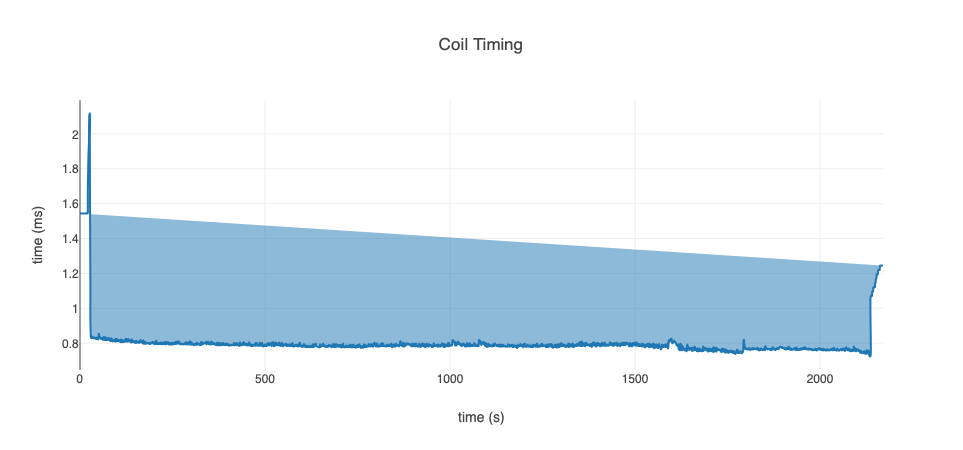

In [27]:
lr.display_graph(['coil_time'], 'Coil Timing', 'time (ms)')

This is the time for the ignition coil to charge up to its specified current, as measured by the MEMS ECU. With a battery voltage of about 14V, this value should be about 2-3mS. A high value for coil charge time may indicate a problem with the ignition coil primary circuit.

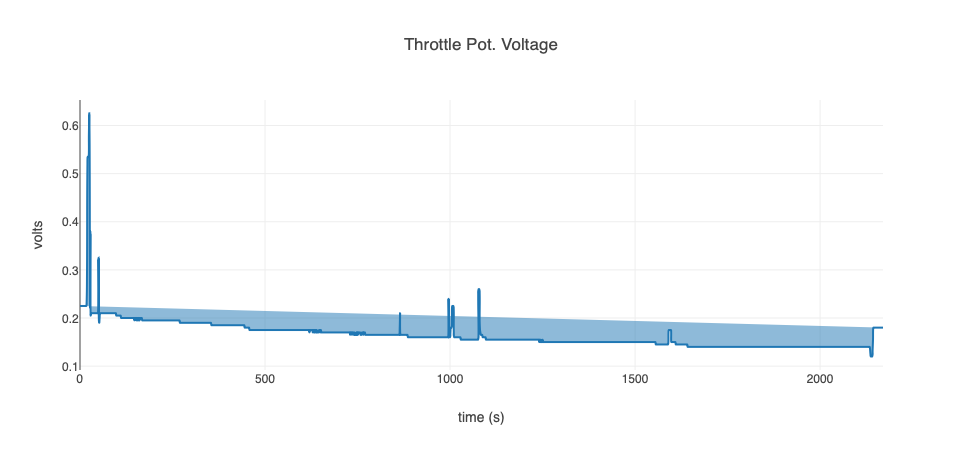

In [28]:
lr.display_graph(['throttle_pot_voltage'], 'Throttle Pot. Voltage', 'volts')

**Throttle Potentiometer Sensor (TPS)**

A TPS is provided to inform the rate of acceleration. The TPS is a potentiometer with three wires. A 5v reference voltage is supplied to a resistance track, with the other end connected to earth. The third wire is connected to an arm which wipes along the resistance track, and so varies the resistance and voltage of the signal returned.
From the voltage returned, the ECU is able to calculate just how quickly the throttle is opened. From model year 1993 onwards, the TPS also informs the ECU of idle position with a voltage of approximately 0.6 volts.

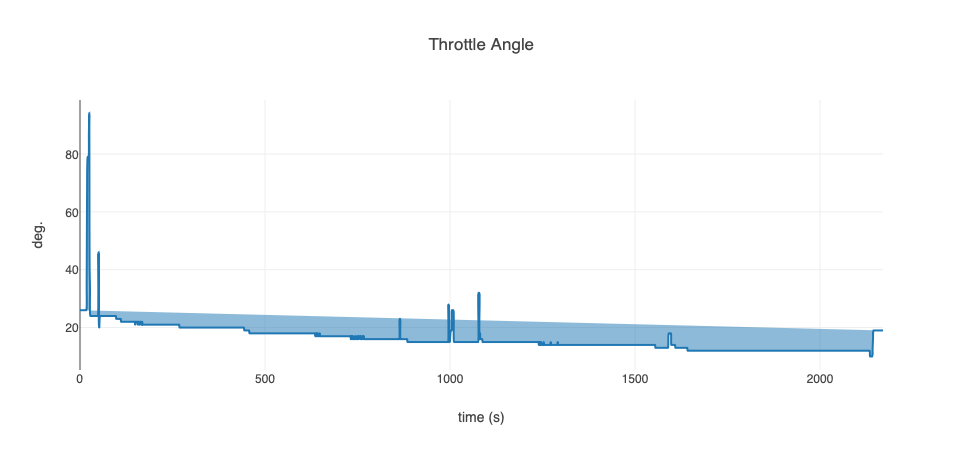

In [29]:
lr.display_graph(['throttle_angle'], 'Throttle Angle', 'deg.')

Shows the position of the throttle disc obtained from the MEMS ECU using the throttle potentiometer. This value should change from a low value to a high value as the throttle pedal is depressed.

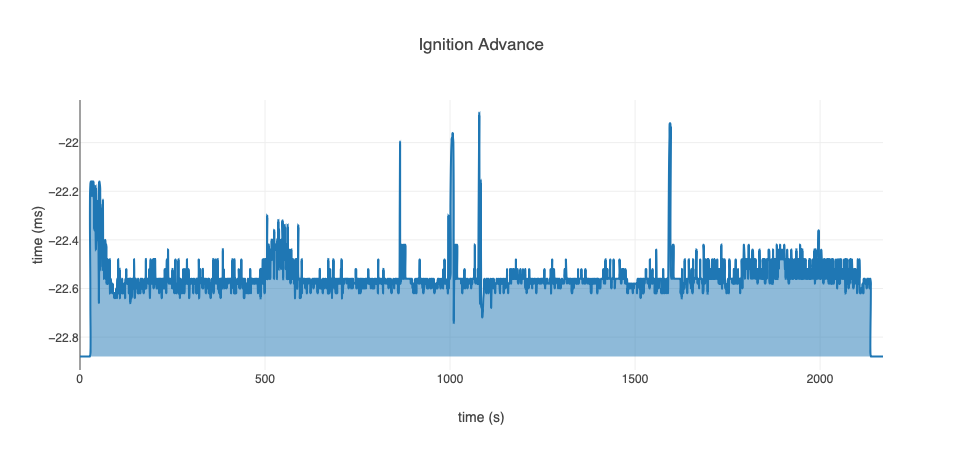

In [30]:
lr.display_graph(['ignition_advance'], 'Ignition Advance', 'time (ms)')

This is a facility which is built into the MEMS ECU to overcome some situations during the service life of a vehicle where it might be wished to eradicate a problem such as a low octane fuel being constantly used or engine wear by slightly advancing the ignition timing. the idle speed of the engine. The function can be removed by resetting the adaptive values.

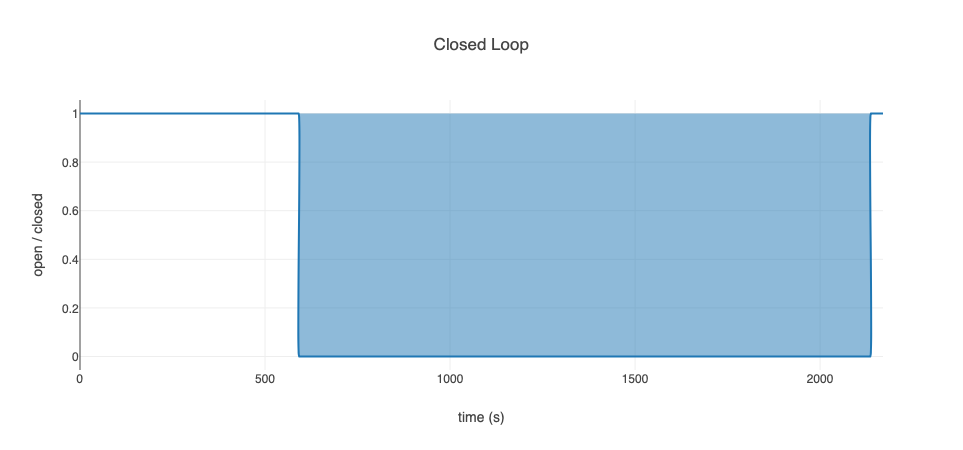

In [31]:
lr.display_graph(['loop_indicator'], 'Closed Loop', 'open / closed')

This shows whether the fuelling is being controlled using feedback from the oxygen sensors. A displayed value of ON indicates that closed loop fuelling is active, a displayed value of OFF indicates fuelling open loop. On a fully warm vehicle, Loop Status should indicate closed loop under most driving and idling conditions.

This is a facility which is built into the MEMS ECU to overcome some situations during the service life of a vehicle where it might be wished to eradicate a problem such as a low octane fuel being constantly used or engine wear by slightly advancing the ignition timing. the idle speed of the engine. The function can be removed by resetting the adaptive values.

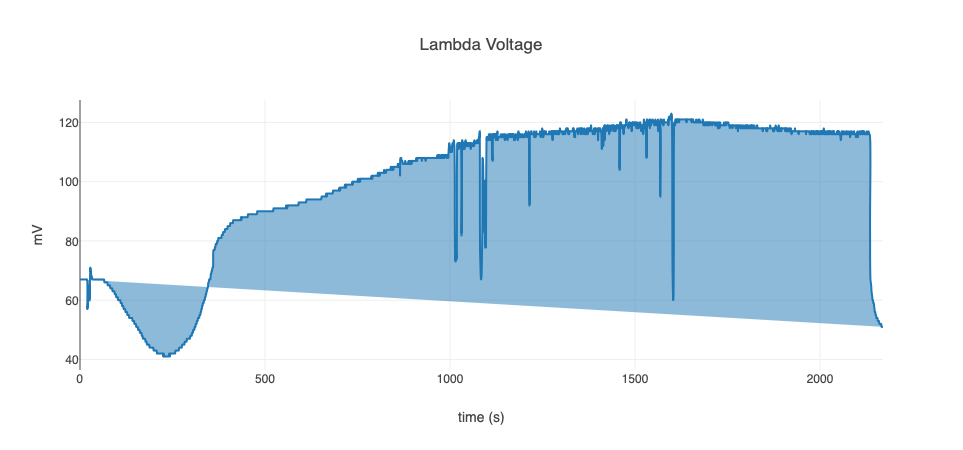

In [32]:
lr.display_graph(['lambda_voltage'], 'Lambda Voltage', 'mV')

This shows the voltage across the oxygen sensor as read by the MEMS ECU. Once the engine is fully warm, during most idle and driving conditions, this voltage will switch rapidly between a value between 0.0v-0.2v to a value between 0.7v and 1.0v. The sensor detects the presence or absence of oxygen in the exhaust gas. When the exhaust gas has oxygen present the ECU will read a low voltage.

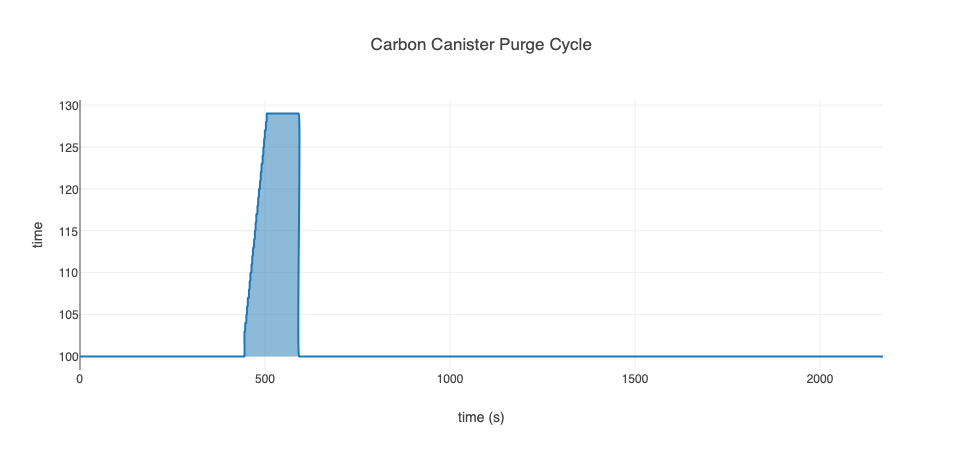

In [33]:
lr.display_graph(['carbon_canister_purge_valve_duty_cycle'], 'Carbon Canister Purge Cycle', 'time')

The canister purge valve forms part of the emission control system. Petrol vapor from the petrol tank that is stored in the carbon absorption filter, is conveyed to the engine through this solenoid valve.
If the lambda control of the engine is functioning, the valve is powered by the control unit. The extra fuel in form of vapor that is conveyed through this system to the engine is compensated for by the lambda control.

Generally the canister purge valve is closed normally. This means that the valve breaks the connection between the intake manifold and the active carbon filter, if no current is running through the valve. The activation of the canister purge valve occurs by means of the control unit connecting the valve to ground. During this time the voltage of the terminal from the control unit that connects the canister purge valve, amounts to 0 Volt. Frequently triggering takes place with pulses. The pulse ratio (duty-cycle) then depends on engine speed, engine temperature and engine load, among other things.

**Carbon filter solenoid valve (CFSV)**

A CFSV and activated carbon canister will also be employed to aid evaporative emission control. The carbon canister stores fuel vapours until the CFSV is actuated by MEMS. CFSV actuation occurs when the engine temperature is above 70°C, the engine speed above 1500 rpm and the MAP sensor returns less than 30 kPa.

When the CFSV is actuated by MEMS,the valve is modulated on and off,and fuel vapours are drawn into the inlet manifold to be burnt by the engine during normal combustion. So that engine performance will not be affected, the CFSV remains closed during cold engine operation and also during engine idle.

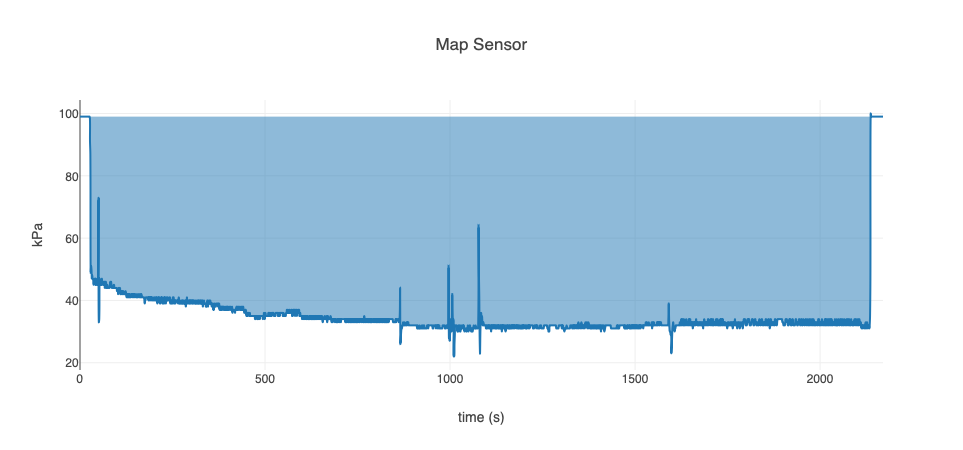

In [34]:
lr.display_graph(['map_sensor'], 'Map Sensor', 'kPa')

Shows the pressure measure by the internal MEMS air pressure sensor. This value should show atmospheric pressure of 100 KPa when the engine is stopped and a lower value between 25 - 40 KPa during engine idle conditions. Very high values may indicate problems with the sensor inside the MEMS or more likely a blocked or disconnected vacuum pipe. Moderately raised values may indicate mechanical problems with the engine.

**MAP Sensor Operation**

The main engine load sensor is the MAP sensor and is a critical part of the engine management. 
A vacuum hose connects the MAP sensor (located within the ECM) and the inlet manifold. Manifold vacuum acts upon the MAP sensor diaphragm, and the ECM converts the pressure into an electrical signal. MAP is calculated from the formula: Atmospheric Pressure less Manifold Pressure = Manifold Absolute Pressure.

Using the speed/density method, MEMS calculates the AFR from the MAP signal and the speed of the engine (CAS). This method relies on the theory that the engine will draw in a fixed volume of air per revolution. The inlet manifold on the MPi models is a 'dry' manifold. Since fuel does not enter the manifold - due to injection being made onto the back of the inlet valve, there is no risk of fuel being drawn into the MAP sensor to contaminate the diaphragm, and a fuel trap is not used. 

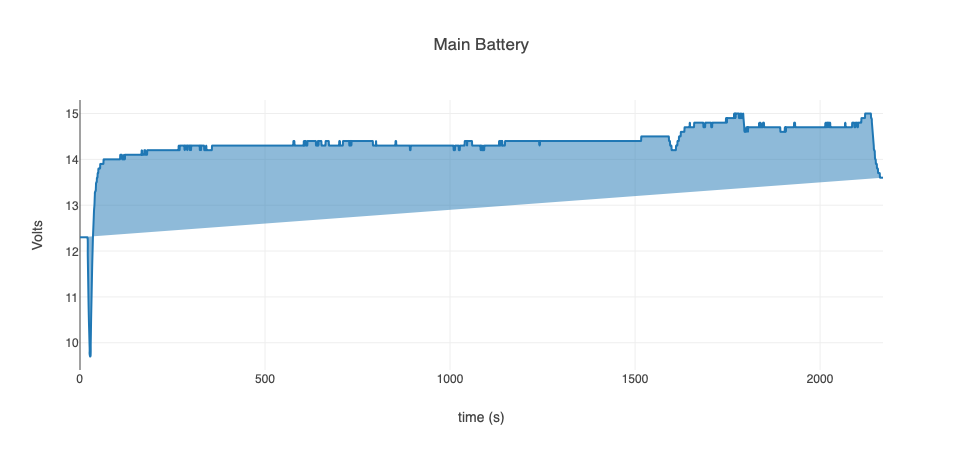

In [35]:
lr.display_graph(['battery_voltage'], 'Main Battery', 'Volts')

This shows the voltage of the vehicle supply measured internally by the ECU. Large errors in this measurement will lead to possible poor starting and errors in idle CO.

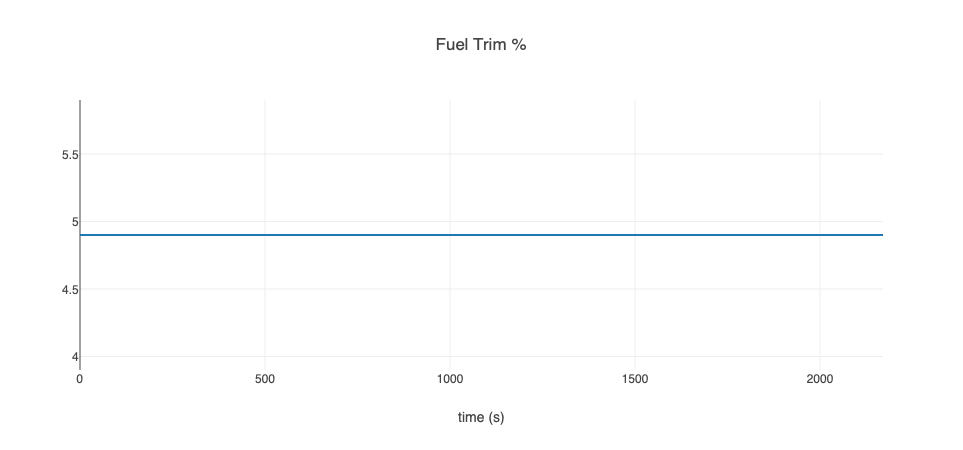

In [36]:
lr.display_graph(['short_term_trim'], 'Fuel Trim %')

**Short Term Fuel Trim (STFT)**

A normal STFT reading will generally fluctuate between negative and positive single digits 2-3 times per second. Usually they'll stay around positive or negative 5%, but they may occasionally go up towards 8 or 9% depending on the efficiency of the engine, age of the components, and other factors. A normal long term fuel trim reading will appear to stay the same, giving a long term average of fuel added. It, too, should be close to zero, positive or negative single digits under normal circumstances. It will fluctuate much slower, possibly appearing static.

If you experience ST or LT fuel trims that are in the double digits positive or negative this would indicate a abnormal adding or lessening of fuel. This could be due to leaking fuel injectors, an unmetered air leak or something similar. For example, if the O2 sensors are reading lean due to, say, a vacuum leak, the engine computer will compensate by adding fuel.

The STFT will start to climb immediately to reflect the computer adding fuel. While the computer is adding fuel it still watches the O2 sensors until the O2 sensors are indicating that the lean condition no longer exists and proper air:fuel ratio is met. The computer will maintain this heightened addition of fuel until the leak is corrected. The scan tool will show STFT readings that are in the positive double digits, indicating that the computer has been adding too much fuel for normal operation. After a while the LTFT will also reflect this relative addition in fuel. Now if the vacuum leak is bad enough, the computer will not be capable of adding enough fuel to achieve proper air:fuel ratio. It will add fuel until the STFT reaches it's max calibration, usually 25%. 

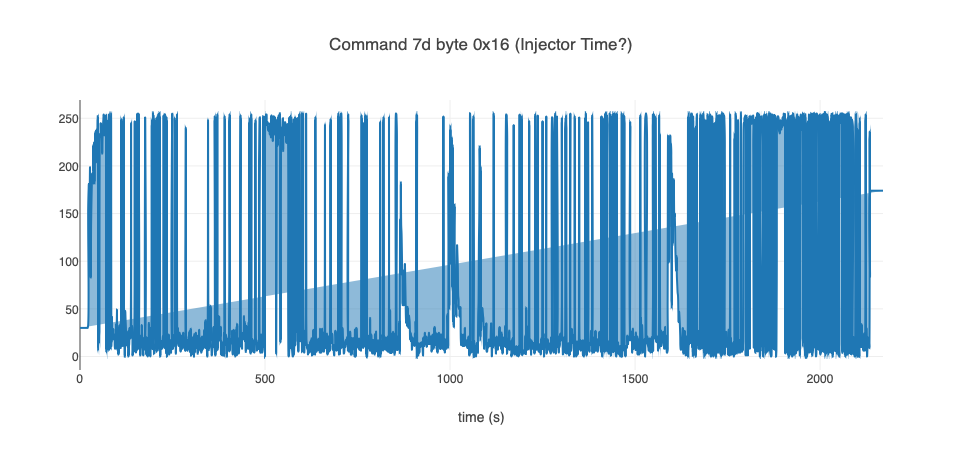

In [37]:
lr.display_graph(['0x16'], 'Command 7d byte 0x16 (Injector Time?)')

This is a representative value (0 to 255) of the correction trim value of the fuel injection time currently being used by the MEMS ECU. This value is mainly used to adjust the idle fuelling. The value of Injector time is normally an adaptive value which is set up automatically by the ECU on Vehicles fitted with an oxygen sensor. However for vehicles not equipped with an Oxygen sensor this value must be adjusted manually to obtain the correct fuelling. This is done by using a CO meter to monitor the exhaust output and adjusting this value until it is correct (open loop tuning) The correct CO values for a given engine can usually be found in the Workshop manual. This value is also shown under dynamic inputs in a scale of microseconds

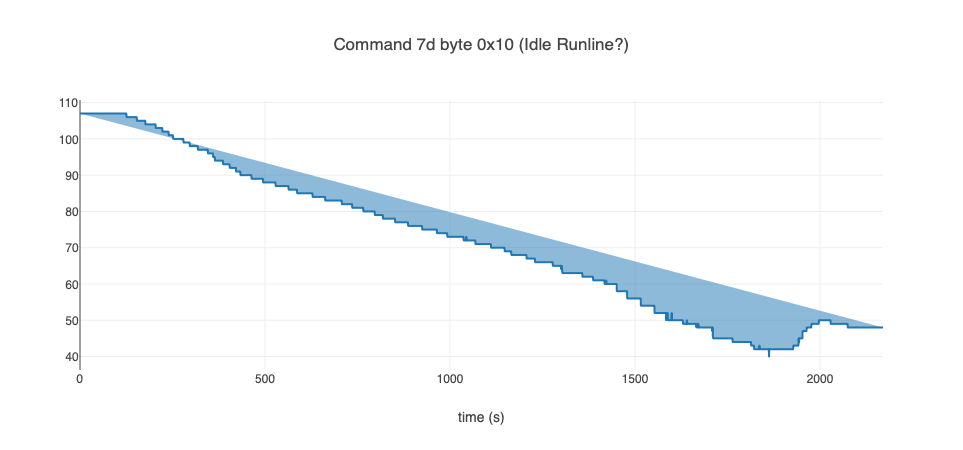

In [38]:
lr.display_graph(['0x10'], 'Command 7d byte 0x10 (Idle Runline?)')

This is the number of steps from 0 which the ECU will use as guide for starting idle speed control during engine warm up. The value will start at quite a high value (>100 steps) on a very cold engine and fall to < 50 steps on a fully warm engine. A high value on a fully warm engine or a low value on a cold engine will cause poor idle speed control. Idle run line position is calculated by the ECU using the engine coolant temperature sensor.

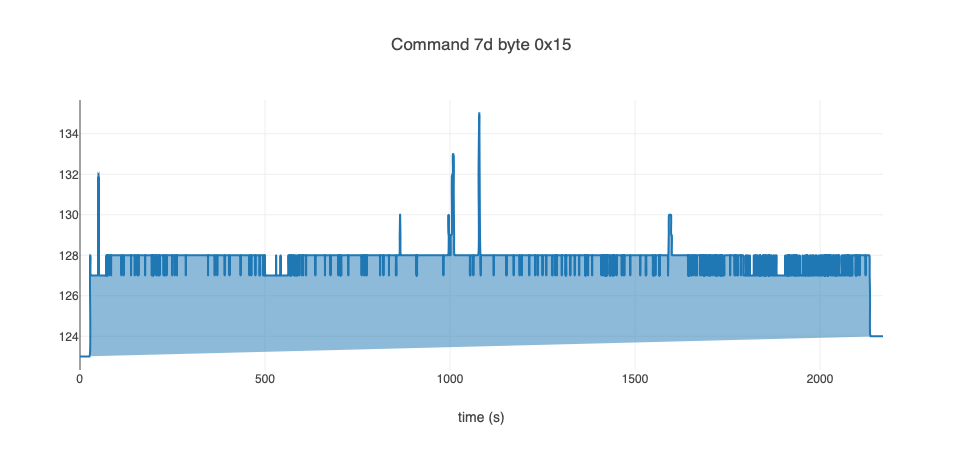

In [39]:
lr.display_graph(['0x15'], 'Command 7d byte 0x15')